In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
from pandas import set_option
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as md
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sklearn
import statsmodels as stm
import patsy

## Loading the allcars dataset and selecting two vehicles

In [2]:
data = pd.read_csv('allcars.csv',nrows = 240000, index_col=0)
data.head()

,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
0,2017-10-31 18:45:59.000000,0,ffb0fd700220fff43fffe74808e73e03f33400ef33fbe1...,2.2,14.48,NaN,NaN,44.313725,NaN,NaN,0.0,0.0,903.0,4.0,NaN,15.686275,1
1,2017-10-31 18:46:00.000000,0,00b0fda802e804e14104ed3d01ee3a08ec4c04f738fbd5...,3.7,14.48,NaN,NaN,35.294118,NaN,NaN,0.0,0.0,938.0,6.0,NaN,15.294118,1
2,2017-10-31 18:46:01.000000,0,00f0fe5002b0fdea4009e33c01ed3701ec4100f53b05e8...,3.9,14.54,NaN,NaN,29.411765,NaN,NaN,0.0,0.0,1044.5,7.0,NaN,14.901961,1
3,2017-10-31 18:46:02.000000,0,0120fdc0028804e03c10de3a09e8400ce43b0ae63b01f4...,3.9,14.56,NaN,NaN,53.725490,NaN,NaN,0.0,0.0,1102.0,7.0,NaN,17.647059,1
4,2017-10-31 18:46:03.000000,0,00a0fde802d816e0370ae73604e23b04e53900e542ffea...,4.7,14.48,NaN,NaN,75.686275,NaN,NaN,0.0,0.0,1626.5,10.0,NaN,23.529412,1


# Yum solutions dataset description

__gps_speed__: Velocidad medida por el GPS.

__cTemp__: Temperatura del refrigerante del motor. *Temperatura de operación normal para la mayoria de vehiculos es de 90°C a 104°C.*

__iat__: Temperatura del sensor ha sido utilizada como una unadiad de contol del motor (ECU), requerimento para clacular el __Volumne de Masa de Aire__. Esto es para ayudar a determinar el requerimiento correcto de combustible del motor para adecuarlo a la temperatura del aire de operación. 

__imap__: El sensor de presion absoluta del colector(Sistema de tubos o conductos que se encargan de distribuir la mezcla de aire/combustible que entra al motor en el ciclo de admisión). Esta informacion de presion es util como unidad de control electronica del motor(ECU). Es usado para caldular la __densidad del aire__ y determinar la __razon de flujo de aire del motor__, que a su vez determina la __dosificacion de combustible requerida para una optima combustion del motor__ e influye en ___el avance o retardo del tiempo de encendido.__

__kpl__: KMPL es el kilometraje en kilómetros por litro. Es una métrica derivada de la velocidad y __*la relación de flujo másico de combustible a aire*__. Esta relación es constante en caso de vehiculos a gasolina, mientras que cambia para otros tipos de combustibles. 

__maf__: Sensor de flujo masico de aire. Se utiliza un sensor de flujo de masa (aire) (MAF) para conocer la __tasa de flujo másico de aire que ingresa a un motor de combustión interna con inyección de combustible__. La información de masa de aire es necesaria para que la unidad de control del motor (ECU) equilibre y entregue __la masa de combustible correcta al motor__.

__rpm__: Revoluciones por minuto del motor.

__speed__: Velocidad medida por el sensor OBD.

__tAdv__: El avance de la temporización se refiere al número de grados antes del punto muerto superior (BTDC) que la chispa encenderá la mezcla de aire y combustible en la cámara de combustión durante la carrera de compresión.
17:14


In [3]:
dfv1 = pd.DataFrame(); dfv2 = pd.DataFrame();
dfv1 = data.loc[data.deviceID == 1]; dfv2 = data.loc[data.deviceID == 2]

In [4]:
set_option('display.max_rows', 10)
dfv1.describe()

,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,117275.000000,117275.000000,117275.000000,0.0,0.0,117275.000000,0.0,0.0,117275.000000,117275.000000,117275.000000,117275.000000,0.0,117275.000000,117275.0
mean,50.327896,8.114516,12.437785,NaN,NaN,46.855066,NaN,NaN,0.003199,0.406219,852.304570,15.390501,NaN,17.561893,1.0
std,22.836783,11.257505,4.295417,NaN,NaN,29.376612,NaN,NaN,0.103067,12.948273,901.577115,21.706871,NaN,7.183419,0.0
min,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0
25%,29.000000,0.000000,12.880000,NaN,NaN,23.921569,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,15.686275,1.0
50%,54.000000,0.000000,14.000000,NaN,NaN,52.156863,NaN,NaN,0.000000,0.000000,902.000000,0.000000,NaN,20.000000,1.0
75%,71.000000,14.900000,14.260000,NaN,NaN,70.196078,NaN,NaN,0.000000,0.000000,1516.000000,28.000000,NaN,20.392157,1.0
max,87.000000,52.900000,48.914000,NaN,NaN,99.607843,NaN,NaN,13.304381,593.990000,12228.500000,191.000000,NaN,74.901961,1.0


In [5]:
dfv2.describe()

,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,106659.000000,106659.000000,106659.000000,106460.000000,106460.0,106659.000000,106460.000000,106460.000000,106659.000000,106659.000000,106659.000000,106659.000000,106460.0,106659.000000,106659.0
mean,63.579239,18.188948,0.009114,64.143575,0.0,35.413494,31.122901,96.442175,0.000664,0.025123,1182.769860,33.042819,0.0,0.001324,2.0
std,38.780889,18.726188,0.665543,29.107386,0.0,22.531762,15.797552,47.344598,0.048472,1.834499,762.717486,34.009781,0.0,0.096652,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.0
25%,25.000000,0.000000,0.000000,60.000000,0.0,22.352941,24.000000,97.000000,0.000000,0.000000,800.750000,0.000000,0.0,0.000000,2.0
50%,60.000000,13.600000,0.000000,80.000000,0.0,38.823529,34.000000,99.000000,0.000000,0.000000,1165.750000,25.000000,0.0,0.000000,2.0
75%,99.000000,27.700000,0.000000,81.000000,0.0,48.235294,43.000000,110.000000,0.000000,0.000000,1732.500000,50.000000,0.0,0.000000,2.0
max,126.000000,82.100000,48.607000,84.000000,0.0,94.901961,58.000000,221.000000,3.540058,133.980000,5508.500000,157.000000,0.0,7.058824,2.0


In [6]:
#Deleting less important variables
dfv1 = dfv1.drop(['accData','dtc','tAdv','deviceID'], axis = 1)
dfv2 = dfv2.drop(['accData','dtc','tAdv','deviceID'], axis = 1)

## Now we select the largest trips from each vehicle

In [7]:
#Find the largets trip in dataframe and report wich its ID
def largest_trip(df, column):
    x = np.zeros(np.max(df[column]))
    for i in range(0,np.max(df[column])):
        x[i] = len(df.loc[df[column] == i])
    return(np.max(x),np.argmax(x))

In [8]:
print('Vehicle 1: ',largest_trip(dfv1, 'tripID'))
print('Vehicle 2: ',largest_trip(dfv2, 'tripID'))

Vehicle 1:  (6496.0, 78)
Vehicle 2:  (4256.0, 124)


In [9]:
trip78 = dfv1.loc[dfv1['tripID'] == 78]
trip124 = dfv2.loc[dfv2['tripID'] == 124]

## We convert the time stamp column to datetime format used by pandas 

In [10]:
trip78['timeStamp'] = pd.to_datetime(trip78['timeStamp'], format="%Y-%m-%d %H:%M:%S.%f")
trip124['timeStamp'] = pd.to_datetime(trip124['timeStamp'], format="%Y-%m-%d %H:%M:%S.%f")

/home/josephvergel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/josephvergel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Ploting the time series 

In [11]:
#setting the timeStamp column like the dataframe new index
trip78.set_index('timeStamp', inplace=True)

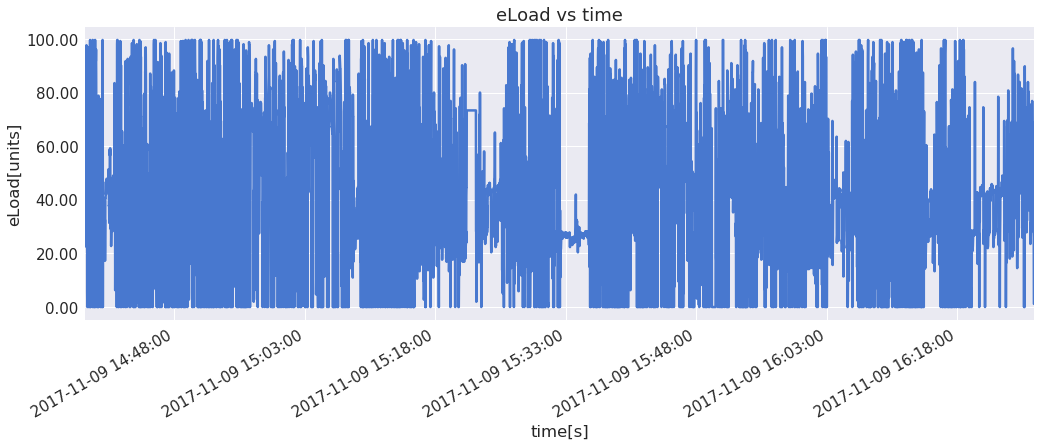

In [12]:
#Example time serie plot
title = 'eLoad vs time'
f= plt.figure(figsize = (17,6))
#ax = sns.tsplot(data=trip78temp['eLoad'])
plt.title(title)
#ticklabels = trip78temp.index.strftime('%Y-%m-%d %H:%M:%S')
#ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax = trip78['eLoad'].plot()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.ylabel('eLoad[units]')
plt.xlabel('time[s]')
plt.show()

In [13]:
def plot_time_series(feature, title, xlabel, ylabel, datetimeformat):
    
    f= plt.figure(figsize = (17,6))
    plt.title(title)
    plt.subplots_adjust(bottom=0.2)
    plt.xticks( rotation=25 )
    ax = plt.gca()
    xfmt = md.DateFormatter(datetimeformat)
    ax.xaxis.set_major_formatter(xfmt)
    ax = feature.plot(color='b',lw = 1)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    return ax

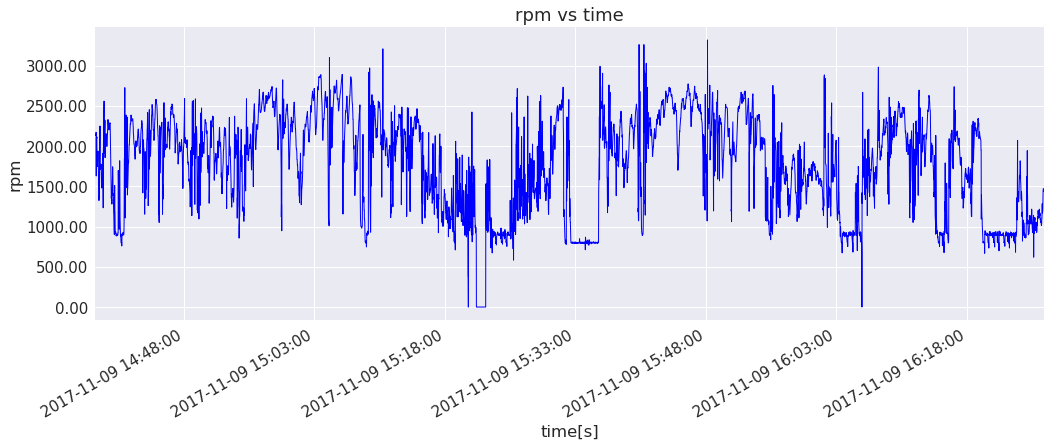

In [14]:
datetimeformat = '%Y-%m-%d %H:%M:%S'
plot_time_series(trip78['rpm'], 'rpm vs time', 'time[s]', 'rpm', datetimeformat)

In [15]:
#subploting some features
def plot_some_tseries(time, feature0, feature1, feature2, feature3, title, xlabel, ylabel0, ylabel1, ylabel2, ylabel3,
                      datetimeformat):
    
    xleft = time.min(); xright = time.max();
    
    f, axarr = plt.subplots(nrows = 4, ncols = 1, figsize = (17,12))
    axarr[0].set_title(title)
    plt.subplots_adjust(bottom = 0.2)
    plt.xticks(rotation = 25)
    for i in range(len(axarr)):
        axarr[i].set_xlim(xleft,xright)
        axarr[i].locator_params(axis = 'y', nbins=3)
    
    xfmt = md.DateFormatter(datetimeformat)
    
    axarr[3].xaxis.set_major_formatter(xfmt)
    
    axarr[0].plot(time, feature0,'g',lw = 0.8)
    axarr[1].plot(time, feature1,'b',lw = 0.8)
    axarr[2].plot(time, feature2,'r',lw = 0.8)
    axarr[3].plot(time, feature3,'black',lw = 0.8)
    
    axarr[3].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))


    axarr[0].set_ylabel(ylabel0)
    axarr[1].set_ylabel(ylabel1)
    axarr[2].set_ylabel(ylabel2)
    axarr[3].set_ylabel(ylabel3)
    
    axarr[3].set_xlabel(xlabel)
    axarr[1].set_xticklabels([]); axarr[2].set_xticklabels([]); axarr[0].set_xticklabels([]);
    
    #return axarr

In [16]:
#Function that plot the all relevant features of the dataset
def feature_subplots(df, title):
    df.plot(subplots=True, layout=(9,1),lw= 1.6,figsize=(16, 24),sharex=True, title=title)

In [17]:
#trip124.replace(0.0, np.nan)
trip124.reset_index()
trip124

,timeStamp,tripID,gps_speed,battery,cTemp,eLoad,iat,imap,kpl,maf,rpm,speed,tPos
102151,2017-12-31 19:25:12,124,6.5,0.0,64.0,40.392157,48.0,97.0,0.0,0.0,930.25,14.0,0.0
102152,2017-12-31 19:25:13,124,6.5,0.0,64.0,41.960784,48.0,96.0,0.0,0.0,923.75,14.0,0.0
102153,2017-12-31 19:25:14,124,6.5,0.0,64.0,38.823529,48.0,96.0,0.0,0.0,979.00,14.0,0.0
102154,2017-12-31 19:25:15,124,6.3,0.0,65.0,41.960784,48.0,97.0,0.0,0.0,992.00,15.0,0.0
102155,2017-12-31 19:25:16,124,8.1,0.0,65.0,46.274510,48.0,97.0,0.0,0.0,1094.75,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106402,2017-12-31 20:36:19,124,17.1,0.0,80.0,43.137255,36.0,105.0,0.0,0.0,1423.25,33.0,0.0
106403,2017-12-31 20:36:20,124,17.9,0.0,80.0,45.098039,36.0,106.0,0.0,0.0,1480.25,35.0,0.0
106404,2017-12-31 20:36:21,124,19.2,0.0,80.0,22.745098,36.0,99.0,0.0,0.0,1473.75,34.0,0.0
106405,2017-12-31 20:36:22,124,19.5,0.0,80.0,24.313725,37.0,100.0,0.0,0.0,1377.00,33.0,0.0


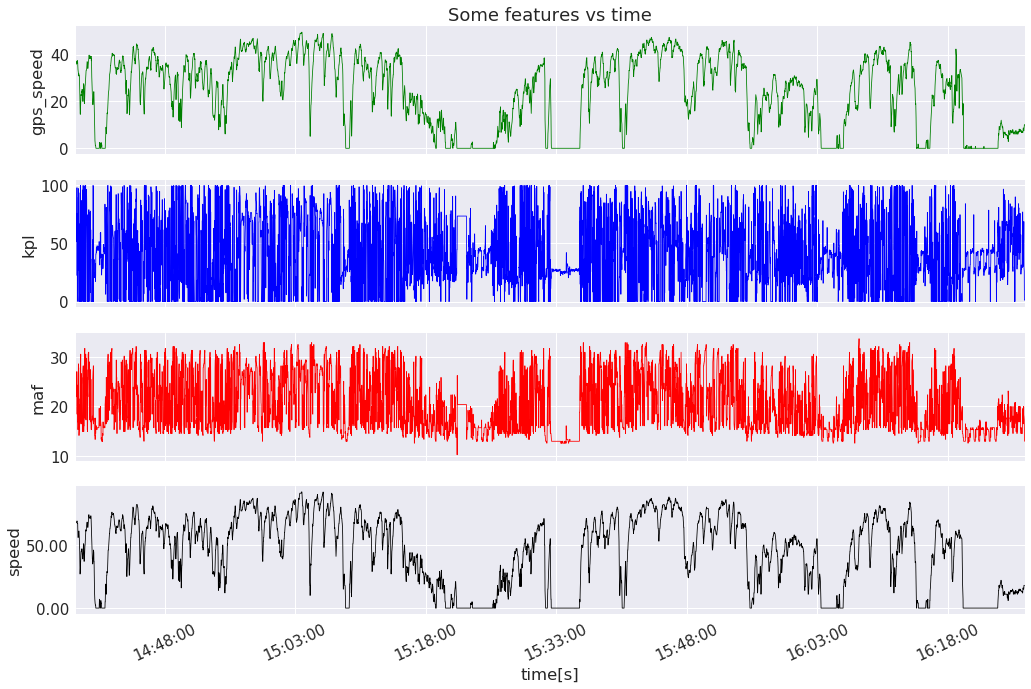

In [18]:
time = trip78.index
datetimeformat = '%H:%M:%S'

plot_some_tseries(time, trip78['gps_speed'], trip78['eLoad'], trip78['tPos'], trip78['speed'],
                  'Some features vs time', 'time[s]', 'gps_speed', 'kpl', 'maf', 'speed', datetimeformat)

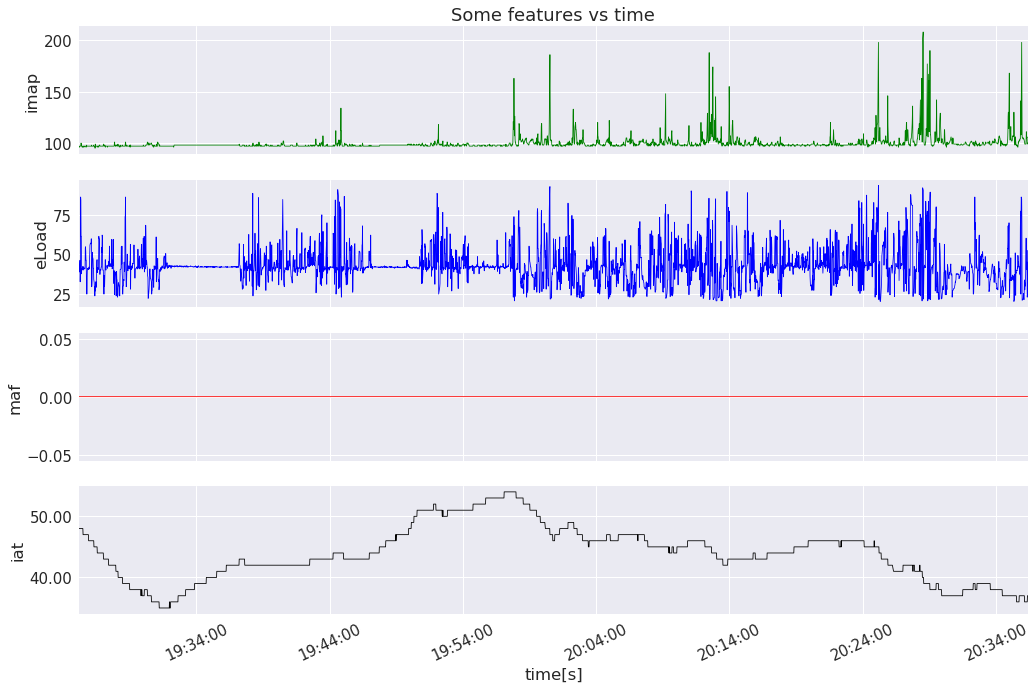

In [19]:
trip124temp = trip124
trip124temp.set_index('timeStamp', inplace=True)
time = trip124temp.index
datetimeformat = '%H:%M:%S'

plot_some_tseries(time, trip124temp['imap'], trip124temp['eLoad'], trip124temp['maf'], trip124temp['iat'],'Some features vs time', 'time[s]', 'imap', 'eLoad', 'maf', 'iat', datetimeformat)

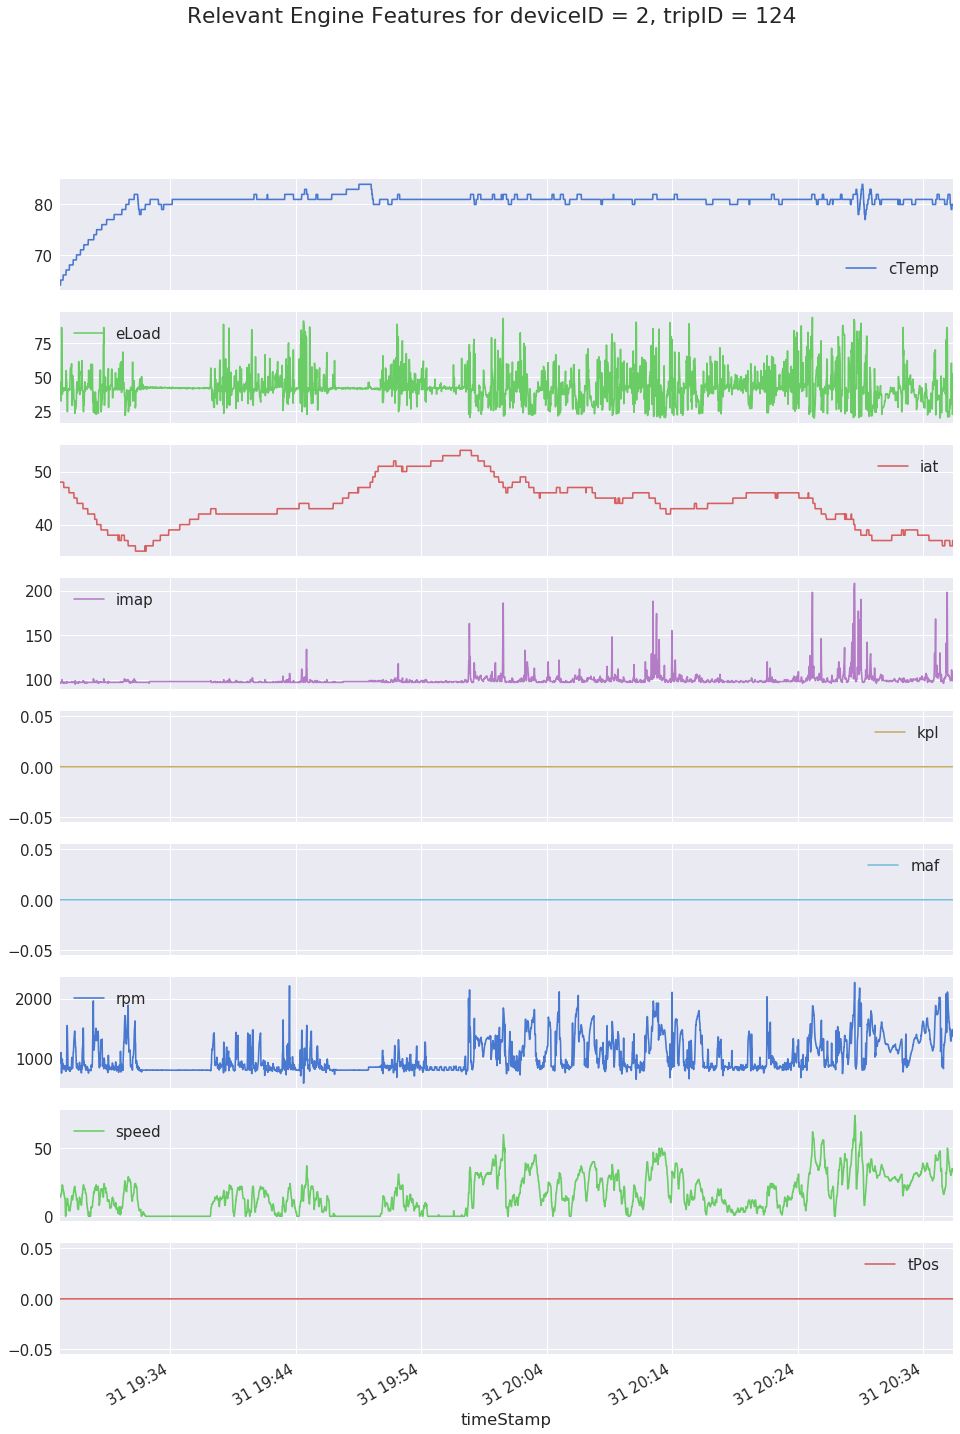

In [20]:
feature_subplots(trip124.drop(['tripID','gps_speed','battery'],axis=1),'Relevant Engine Features for deviceID = 2, tripID = 124')

# Mining Time Series Data

## 1. Time series preparation and similarity

### 1.1 Handling missing values
The best options are the estimative methods. Linear interpolate is a good technique.

In [21]:
trip124 = trip124.replace(0.0,np.nan)
trip124['cTemp'] = trip124['cTemp'].interpolate(); trip124['eLoad'] = trip124['eLoad'].interpolate();
trip124['iat'] = trip124['iat'].interpolate(); trip124['imap'] = trip124['imap'].interpolate();
trip124['rpm'] = trip124['rpm'].interpolate(); trip124['speed'] = trip124['speed'].interpolate()

In [22]:
#We check that there are no missing values in the dataframe
zeros = trip124.loc[trip124['speed'] == 0.0]
print(zeros)

Empty DataFrame
Columns: [tripID, gps_speed, battery, cTemp, eLoad, iat, imap, kpl, maf, rpm, speed, tPos]
Index: []


In [23]:
trip124 = trip124.reset_index()
trip124


,timeStamp,tripID,gps_speed,battery,cTemp,eLoad,iat,imap,kpl,maf,rpm,speed,tPos
0,2017-12-31 19:25:12,124,6.5,NaN,64.0,40.392157,48.0,97.0,NaN,NaN,930.25,14.0,NaN
1,2017-12-31 19:25:13,124,6.5,NaN,64.0,41.960784,48.0,96.0,NaN,NaN,923.75,14.0,NaN
2,2017-12-31 19:25:14,124,6.5,NaN,64.0,38.823529,48.0,96.0,NaN,NaN,979.00,14.0,NaN
3,2017-12-31 19:25:15,124,6.3,NaN,65.0,41.960784,48.0,97.0,NaN,NaN,992.00,15.0,NaN
4,2017-12-31 19:25:16,124,8.1,NaN,65.0,46.274510,48.0,97.0,NaN,NaN,1094.75,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,2017-12-31 20:36:19,124,17.1,NaN,80.0,43.137255,36.0,105.0,NaN,NaN,1423.25,33.0,NaN
4252,2017-12-31 20:36:20,124,17.9,NaN,80.0,45.098039,36.0,106.0,NaN,NaN,1480.25,35.0,NaN
4253,2017-12-31 20:36:21,124,19.2,NaN,80.0,22.745098,36.0,99.0,NaN,NaN,1473.75,34.0,NaN
4254,2017-12-31 20:36:22,124,19.5,NaN,80.0,24.313725,37.0,100.0,NaN,NaN,1377.00,33.0,NaN


### 1.2 Noise removal: Triple exponential smoothing or Holt-Winters method with global optimization

No we will use the Fecon235 python lirary to implment the Holt-Winters method with global optimization.

Be carefull! In general, the gradient descent technique may be trapped in local optima if the problem being solved is not convex. Rather, you should use a global optimization technique such as Genetic Algorithms, PSO algorithms, Estimation of Distribution Algorithms, etc.

The __*optimize_holt*__ function is a minimum brute force algorithm.

In [24]:
from fecon235.fecon235 import *
grids = 20
go_cTemp = trip124.drop(['timeStamp','tripID','gps_speed','battery','eLoad','iat','imap',
                         'kpl','maf','rpm','speed','tPos'],axis = 1)

In [25]:
#Global optimization of parametters alpha and beta for Holt-Winters method
alpha = 0; beta = 0; losspc = 0; loss = 0;
alpha, beta, losspc, loss = optimize_holt(go_cTemp, grids=grids, alphas=(0.0, 1.0), betas=(0.0, 1.0))

In [26]:
#Holt_Winters method with the optimal alpha and beta parameters
holt_cTemp = holt(go_cTemp, alpha=alpha, beta=beta)
holt_cTemp.head()

,Y,Level,Growth
0,64.0,64.00000,0.0
1,64.0,64.00000,0.0
2,64.0,64.00000,0.0
3,65.0,64.78950,0.0
4,65.0,64.95569,0.0


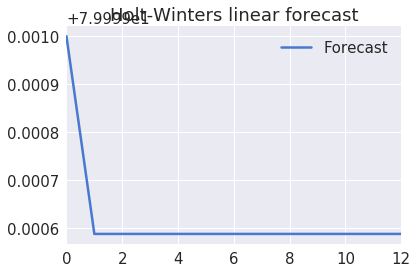

In [27]:
plotholt(holt_cTemp, h=12)

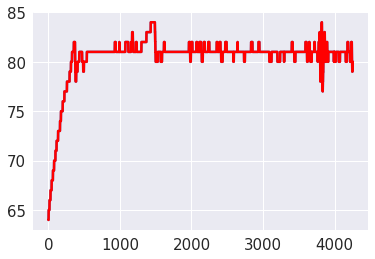

In [28]:
#plt.figure(figsize=(16,10))
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(go_cTemp)
ax1.plot(holt_cTemp.drop(['Level','Growth'],axis = 1), color='r')
plt.show()

Repeat the process for whole features

In [29]:
def holt_features(df,grids):
    alpha = 0; beta = 0; losspc = 0; loss = 0;
    alpha, beta, losspc, loss = optimize_holt(df, grids=grids, alphas=(0.0, 1.0), betas=(0.0, 1.0))
    holtdf = holt(df, alpha=alpha, beta=beta)
    return(holtdf)

(0, 4255)

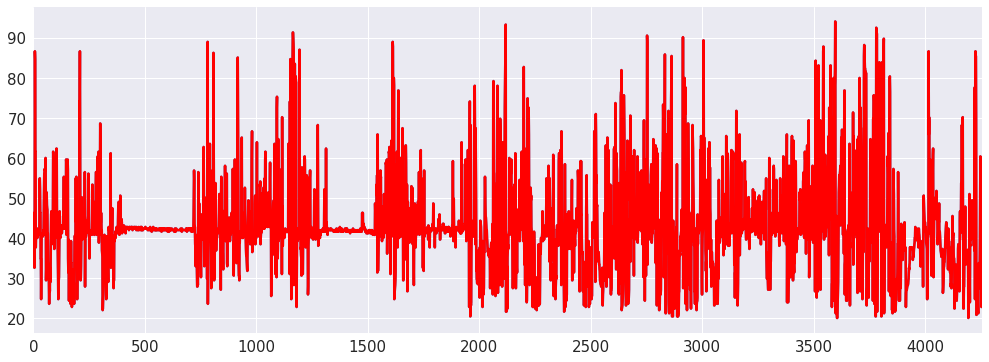

In [30]:
go_eLoad = trip124.drop(['timeStamp','tripID','gps_speed','battery','cTemp','iat','imap',
                         'kpl','maf','rpm','speed','tPos'],axis = 1)

holt_eLoad = holt_features(go_eLoad,grids)

fig2 = plt.figure(figsize=(17,6))
ax2 = fig2.add_subplot(111)
ax2.plot(go_eLoad)
ax2.plot(holt_eLoad.drop(['Level','Growth'],axis = 1), color='r')
ax2.set_xlim(holt_eLoad.index.min(),holt_eLoad.index.max())

In [31]:
trip124.columns

Index(['timeStamp', 'tripID', 'gps_speed', 'battery', 'cTemp', 'eLoad', 'iat',
       'imap', 'kpl', 'maf', 'rpm', 'speed', 'tPos'],
      dtype='object')

In [32]:
go_iat = trip124.drop(['timeStamp','tripID','gps_speed','battery','cTemp','eLoad','imap',
                         'kpl','maf','rpm','speed','tPos'],axis = 1)
holt_iat = holt_features(go_iat,grids)

go_imap = trip124.drop(['timeStamp','tripID','gps_speed','battery','cTemp','eLoad','iat',
                         'kpl','maf','rpm','speed','tPos'],axis = 1)
holt_imap = holt_features(go_imap,grids)

go_rpm = trip124.drop(['timeStamp','tripID','gps_speed','battery','cTemp','eLoad','imap',
                         'kpl','maf','iat','speed','tPos'],axis = 1)
holt_rpm = holt_features(go_rpm,grids)

go_speed = trip124.drop(['timeStamp','tripID','gps_speed','battery','cTemp','eLoad','imap',
                         'kpl','maf','rpm','iat','tPos'],axis = 1)
holt_speed = holt_features(go_speed,grids)

### 1.3 Normalization using scikitlearn

In [33]:
from sklearn import preprocessing

trip124norm = pd.DataFrame()
trip124norm = pd.concat([holt_cTemp['Y'],holt_eLoad['Y'],holt_iat['Y'],holt_imap['Y'],holt_rpm['Y'],
                         holt_speed['Y']],axis = 1)

X = trip124norm
# normalize the data attributes
normalized_X = preprocessing.normalize(X)
trip124norm =pd.DataFrame(normalized_X)
trip124norm = trip124norm.rename(columns={0:'cTemp',1:'eLoad',2:'iat',3:'imap',4:'rpm',5:'speed'})
trip124norm.head()

,cTemp,eLoad,iat,imap,rpm,speed
0,0.068108,0.042985,0.051081,0.103226,0.989963,0.014899
1,0.068580,0.044964,0.051435,0.102870,0.989860,0.015002
2,0.064790,0.039303,0.048593,0.097185,0.991086,0.014173
3,0.064935,0.041919,0.047952,0.096904,0.991016,0.014985
4,0.058925,0.041950,0.043514,0.087935,0.992437,0.014505


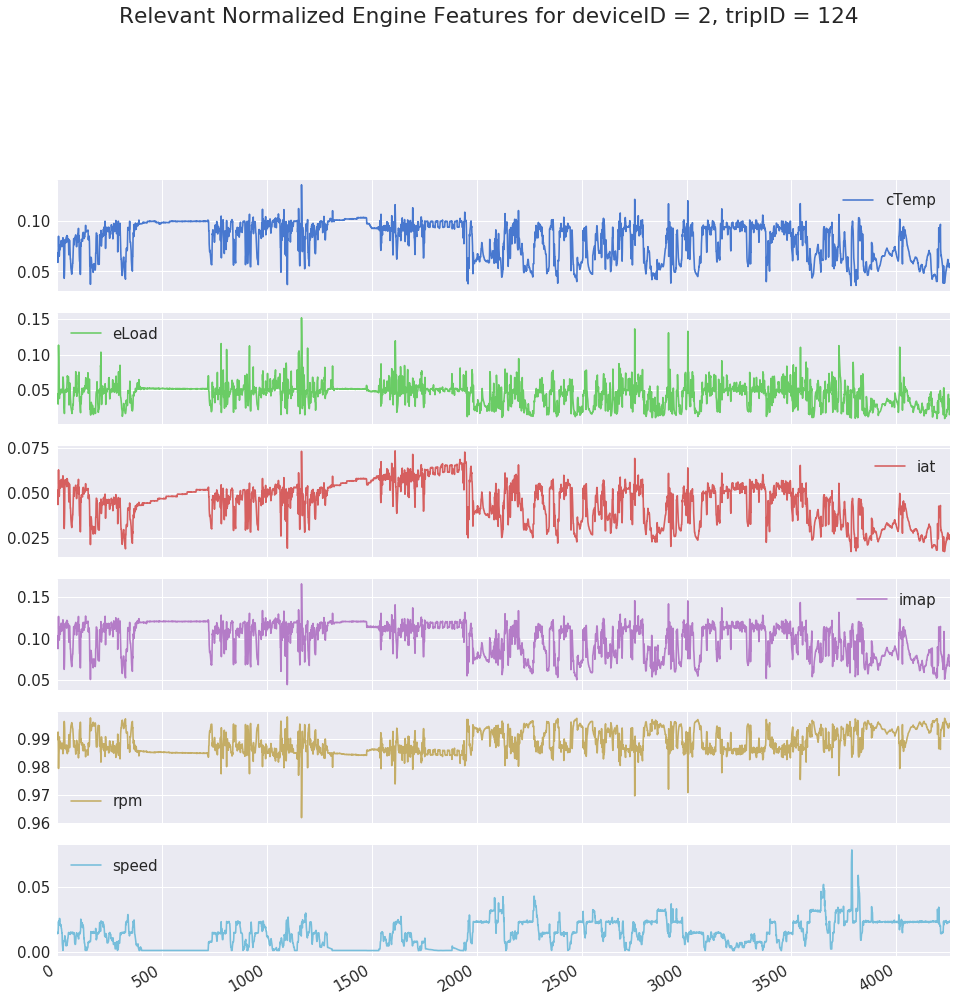

In [34]:
feature_subplots(trip124norm,'Relevant Normalized Engine Features for deviceID = 2, tripID = 124')

In [35]:
# Normalize time series data
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

trip124scaled = pd.DataFrame()
trip124scaled = pd.concat([holt_cTemp['Y'],holt_eLoad['Y'],holt_iat['Y'],holt_imap['Y'],holt_rpm['Y'],
                         holt_speed['Y']],axis = 1)
values = trip124scaled.values
len(values)

4256

In [36]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(values)
trip124scaled = pd.DataFrame(scaled_df, columns=['cTemp','eLoad','iat','imap','rpm','speed'])

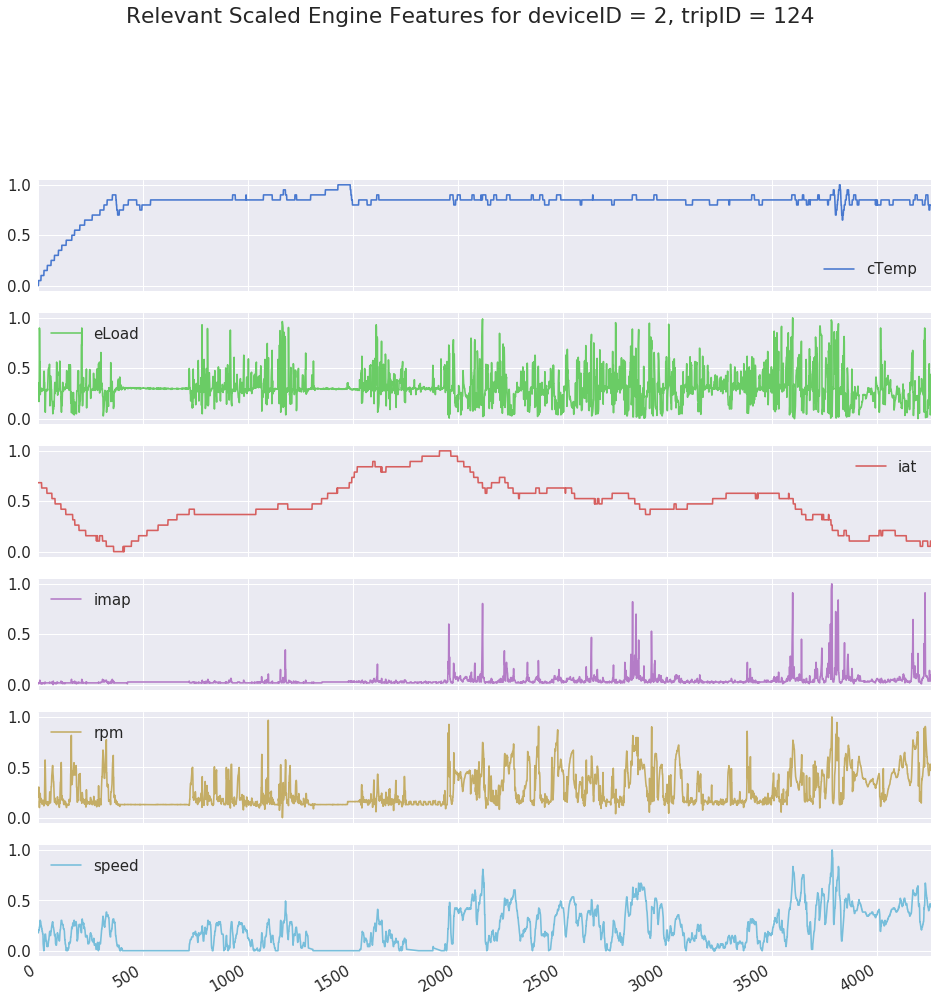

In [38]:
feature_subplots(trip124scaled,'Relevant Scaled Engine Features for deviceID = 2, tripID = 124')

With these two results, we show that the best option for this dataset is the MinMaxScaler from Scikit Learn.

# Analysing dtc: Diagnostic Trouble Codes 

Valores de 255 en la caracteristica dtc representan un diagnostico de el aire y el combustible en el motor y etsan directamente ralacionados con la caracteristica eLoad del motor

In [37]:
holt_eLoad

,Y,Level,Growth
0,40.392157,40.392157,0.0
1,41.960784,41.960784,0.0
2,38.823529,38.823529,0.0
3,41.960784,41.960784,0.0
4,46.274510,46.274510,0.0
...,...,...,...
4251,43.137255,43.137255,0.0
4252,45.098039,45.098039,0.0
4253,22.745098,22.745098,0.0
4254,24.313725,24.313725,0.0
